# Exercise Sheet 10 - Sentiment Analysis

## Learning Objectives
In this lab we are going to:
- do sentiment analysis for movie reviews using nltk
- learn about cross-validation
- classification using sklearn
- play with sentiment lexicon features


In [ ]:
#setting the stage, as usual with colab ;)
import nltk
nltk.download('all')

## Sentiment Analysis of Movie reviews

Sentiment analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.


In [ ]:
# importing necessary libraries
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

The movie_review dataset was the first to be used for Sentiment Analysis, and is treated as a standard dataset to compare sentiment accuracies. This dataset is therefore included in the NLTK corpora.


### Data Observation
Wordclouds are used to observe a dataset and allow us to observe the issues and challenges associated with sentiment analysis. We are going to explore the movie reviews dataset using this nice tool as follows:

In [ ]:
# Function that creates the dictionary in the form acceptable to nltk Naive Bayes classifier
# This function translates given text into a compatible feature vector for nltk Naive Bayes
# We tokenizing, preprocessing and removing punctuations from the text before creating feature vector
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english") and word not in list(string.punctuation)]
    my_dict = dict([(word.lower(), True) for word in useful_words])
    return my_dict

In [ ]:
# Expected input to Naive Bayes classifier
create_word_features(['the', 'quick', 'brown', 'quick', 'a', 'fox'])

{'brown': True, 'fox': True, 'quick': True}

In [ ]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [ ]:
# reading the dataset
# this takes a little while to execute...
reviews = []
for fileid in movie_reviews.fileids():
    words = movie_reviews.words(fileid)
    if fileid.split("/")[0] == "neg":
      reviews.append((create_word_features(words), "negative"))
    else :
      reviews.append((create_word_features(words), "positive"))

In [ ]:
# print the first review
print(reviews[0])    
print(len(reviews))

({'plot': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'church': True, 'party': True, 'drink': True, 'drive': True, 'get': True, 'accident': True, 'one': True, 'guys': True, 'dies': True, 'girlfriend': True, 'continues': True, 'see': True, 'life': True, 'nightmares': True, 'deal': True, 'watch': True, 'movie': True, 'sorta': True, 'find': True, 'critique': True, 'mind': True, 'fuck': True, 'generation': True, 'touches': True, 'cool': True, 'idea': True, 'presents': True, 'bad': True, 'package': True, 'makes': True, 'review': True, 'even': True, 'harder': True, 'write': True, 'since': True, 'generally': True, 'applaud': True, 'films': True, 'attempt': True, 'break': True, 'mold': True, 'mess': True, 'head': True, 'lost': True, 'highway': True, 'memento': True, 'good': True, 'ways': True, 'making': True, 'types': True, 'folks': True, 'snag': True, 'correctly': True, 'seem': True, 'taken': True, 'pretty': True, 'neat': True, 'concept': True, 'executed': True, 'terribly': 

In [ ]:
# split the data to positive & negative reviews
pos_reviews = ''
neg_reviews = ''
for i in range(len(reviews)):
  if reviews[i][1] == "positive":
    pos_reviews += " ".join(reviews[i][0]) + " "
  else :
    neg_reviews += " ".join(reviews[i][0]) + " "

In [ ]:
# generate wordcloud methods
def generate_word_cloud(sentence):
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(sentence) 
  return wordcloud

def plot_wordcloud(wordcloud):
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  return plt.show()

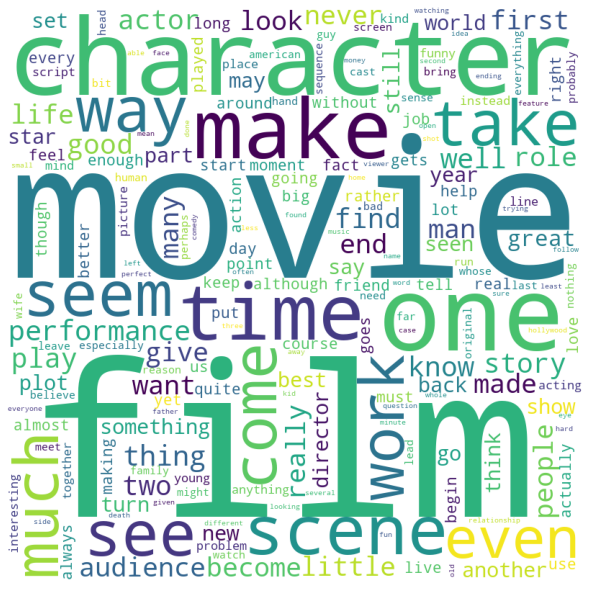

In [ ]:
# wordcloud for positive reviews
wordcloud = generate_word_cloud(pos_reviews)
plot_wordcloud(wordcloud)

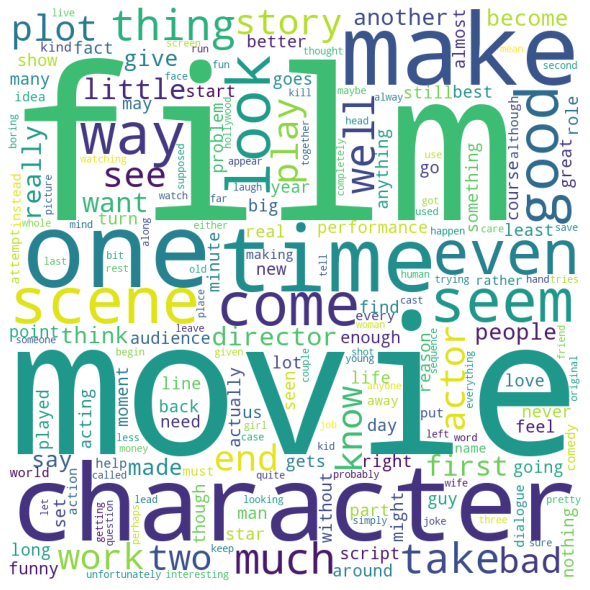

In [ ]:
# wordcloud for negative reviews
wordcloud = generate_word_cloud(neg_reviews)
plot_wordcloud(wordcloud)

**Exercise 1:**

Can you figure out the issues and challenges associated with sentiment analysis on this dataset by looking at wordclouds?

### Dataset Processing and Classification
We have a 1000 negative and 1000 positive reviews, for a total of 2000. We will need to create our test and train samples in order to be able to pass them to a classifier.

**Exercise 2:**

Create train and test split with 0.1 test size by using train_test_split from sklearn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Your code goes here
train_set, test_set = train_test_split(reviews, test_size=0.1)

Now we can train a NB classifier on our data as follows:

In [ ]:
# training the Naive Bayes Classifier, based on the training set
classifier = NaiveBayesClassifier.train(train_set)

Let us check the performance of the classifier on the test_set

In [ ]:
accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(accuracy * 100)

71.5


### Sentiment classification
Given new unseen reviews we can predict their sentiment using our model and the sentiment-related features as discussed in the lecture. Here we have two reviews, which are santa_review and spirit_review. 

**Exercise 3:**

Write a function that predicts the sentiment for the texts (santa_review and spirit_review) below?

In [ ]:
santa_review = '''
 
It would be impossible to sum up all the stuff that sucks about this film, so I'll break it down into what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with the most unnatural laugh you're ever likely to hear; an ex-dope addict martian with tics; kid actors who make sure every syllable of their lines are slowly and caaarreee-fulll-yyy prrooo-noun-ceeed; a newspaper headline stating that Santa's been "kidnaped", and a giant robot. Yes, you read that right. A giant robot.
 
The worst acting job in here must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. Could they be *more* trembling? I know this was the sixties and everyone was doped up, but still.
'''

In [ ]:
spirited_review = '''
Spirited Away' is the first Miyazaki I have seen, but from this stupendous film I can tell he is a master storyteller. A hallmark of a good storyteller is making the audience empathise or pull them into the shoes of the central character. Miyazaki does this brilliantly in 'Spirited Away'. During the first fifteen minutes we have no idea what is going on. Neither does the main character Chihiro. We discover the world as Chihiro does and it's truly amazing to watch. But Miyazaki doesn't seem to treat this world as something amazing. The world is filmed just like our workaday world would. The inhabitants of the world go about their daily business as usual as full with apathy as us normal folks. Places and buildings are not greeted by towering establishing shots and majestic music. The fact that this place is amazing doesn't seem to concern Miyazaki.
 
What do however, are the characters. Miyazaki lingers upon the characters as if they were actors. He infixes his animated actors with such subtleties that I have never seen, even from animation giants Pixar. Twenty minutes into this film and I completely forgot these were animated characters; I started to care for them like they were living and breathing. Miyazaki treats the modest achievements of Chihiro with unashamed bombast. The uplifting scene where she cleanses the River God is accompanied by stirring music and is as exciting as watching gladiatorial combatants fight. Of course, by giving the audience developed characters to care about, the action and conflicts will always be more exciting, terrifying and uplifting than normal, generic action scenes. 
'''

In [ ]:
def predict_sentiment(sentence):
  words = word_tokenize(sentence)
  words = create_word_features(words)
  return classifier.classify(words)

In [ ]:
predict_sentiment(santa_review)

'negative'

In [ ]:
predict_sentiment(spirited_review)

'positive'

### Training using Cross Validation

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples (www.openml.org)

In [ ]:
# import nltk
# nltk.download('movie_reviews') # just to be sure (:
# from nltk.corpus import movie_reviews

# step 1: dataset preparation
# extract the reviews as a list of (document, sentiment) tuples
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

print(len(documents),"reviews")
print("ranging in length from",min(len(d[0]) for d in documents),
     "to",max(len(d[0]) for d in documents),", average",sum(len(d[0]) \
                                  for d in documents)/len(documents))
print("review categories:", set(doc[1] for doc in documents))

2000 reviews
ranging in length from 19 to 2879 , average 791.91
review categories: {'pos', 'neg'}


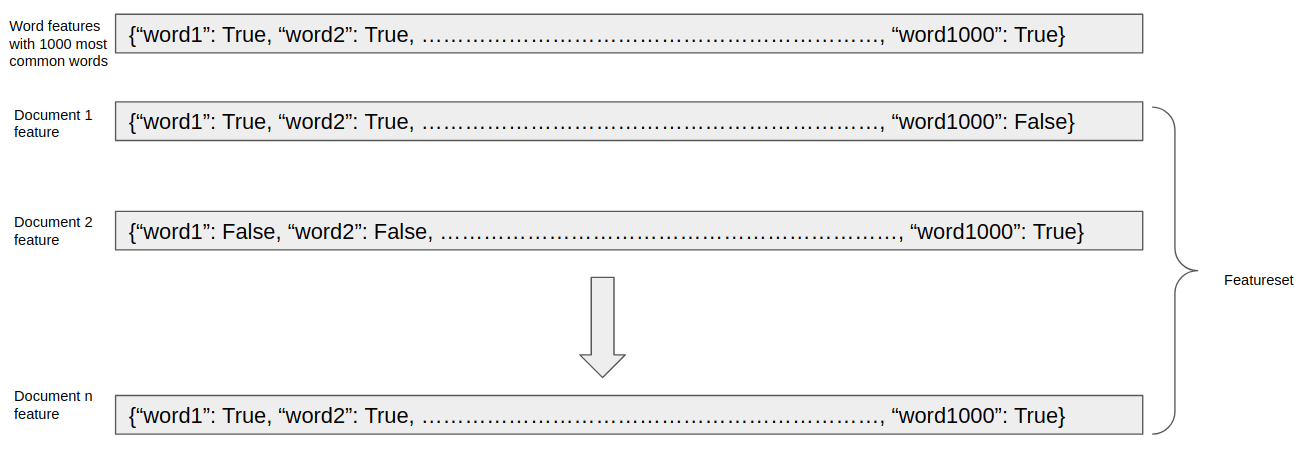

In [ ]:
# step 2: prepare features for sentiment analysis

# use the 1000 most frequent words as features
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
# NOTE: most_common() returns a list of (word, count) tuples
# We will use these word features to design document feature i.e. review in our case
word_features = [w for w,_ in all_words.most_common(1000)]

# features from document
import copy

# This function creates document features
# Each word set to False and turned true only if the words from both document features and word feature matches
# In this way each document is represented in the form of 1000 most common words
# This helps in restricting dimension of each document to 1000
def document_features(document):
    document_words = set(document)
    features = copy.deepcopy(document_features._empty_features)
    for word in document_words:
        if word in features:
            # binary word features: True if word is present
            features[word] = True
    return features

# below is a way to make essentially a static variable in a function
# We are creating a static variable called document_features._empty_features that refers to a dictionary object which consists all the words from the features to False
document_features._empty_features = {word:False for word in word_features}

In [ ]:
# this takes a little while to execute...
# some nltk functions use this format: a list of (features,class) tuples
# below line of code creates feature set for all the documents (reviews)
featuresets = [(document_features(d), c) for (d,c) in documents]

In [ ]:
# step 3: train the model using cross_validation

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from tqdm import tqdm
import sys


def crossValidate(data, model, n_folds, random_state):
    """Do cross validation on an nltk model.
    Parameters:
       data : 
    returns a tuple: (Precision, Recall, F1, average Accuracy)"""
    data = np.array(data)
    X,Y = zip(*data)  # X=feature sets, Y=pos/neg labels
    X,Y = map(np.array,(X,Y))
    
    pred = [] # will contain predicited pos/neg labels
    real = [] # will contain real pos/neg labels
    cv = StratifiedKFold(n_splits=n_folds, \
                    shuffle=True, random_state=random_state)
    
    for train_indexes, test_indexes in tqdm(cv.split(X,Y)):
        classifier = model.train(data[train_indexes])
        thisPred = classifier.classify_many(X[test_indexes])
        pred.extend(thisPred)
        real.extend(Y[test_indexes])
    print()
    return print(classification_report(real, pred))

In [ ]:
# apply 10-fold cross validation using the nltk.NaiveBayesClassifier
n_folds=10
random_state=0
crossValidate(featuresets, nltk.NaiveBayesClassifier, n_folds,random_state)

10it [00:23,  2.32s/it]


              precision    recall  f1-score   support

         neg       0.77      0.81      0.79      1000
         pos       0.80      0.75      0.78      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



**Exercise 4:**

1) What can you infer from the above classification report?

2) When should cross-validation be used?

## Features from Sentiment Lexicon
We can use sentiment-scored features in order to improve our sentiment analysis model. These scores can be obtained from an existing lexicon such as SentiWordNet. As mentioned in previous lectures, WordNet provides "synsets"  which are lists of words with similar semantic contexts. These can be used to disambiguate the sense of a word in natural language. SentiWordnet adds sentiment scores to the synsets. Each synset has a probability of being positive, negative or objective (neutral).

In [ ]:
import nltk
nltk.download("sentiwordnet")
nltk.download("wordnet")
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Here is how to use SentiWordNet.

In [ ]:
# example usage of sentiwordnet
swn_flower = swn.senti_synsets('flower')
for x in swn_flower:
    print("%.3f %.3f %.3f"%(x.pos_score(), x.obj_score(), x.neg_score()), \
          x.synset.name(), x.synset.lemma_names())
print(x.synset.definition())

0.000 1.000 0.000 flower.n.01 ['flower']
0.000 1.000 0.000 flower.n.02 ['flower', 'bloom', 'blossom']
0.375 0.625 0.000 flower.n.03 ['flower', 'prime', 'peak', 'heyday', 'bloom', 'blossom', 'efflorescence', 'flush']
0.000 1.000 0.000 bloom.v.01 ['bloom', 'blossom', 'flower']
produce or yield flowers


Let us use it to disambiguate the words of a given sentence and add sentiment scores.

In [ ]:
from nltk.wsd import lesk # lesk is a naive sense disambiguation approach
                          # synset descriptions are compared to the context of the word
def sentiScore(sentence):
    """Disambiguates words in sentence and adds sentiment scores for the 
    corresponding synsets. Returns a numpy array with positive, objective
    and negative scores"""
    scores = np.array([0.,0.,0.])
    found = 0
    for word,i in zip(sentence, range(len(sentence))):
        syn = lesk(sentence[i-10:i+10], word) # guess which word sense 
                                          # using the "lesk" algorithm
        if syn:
            syn = swn.senti_synset(syn.name())    # convert the wordnet 
                              # synset into a sentiwordnet senti_synset
        if syn:
            scores += np.array([syn.pos_score(), syn.obj_score(), \
                                syn.neg_score()]) # vector addition
            found += 1
    scores /= found
    return scores

Now we can prepare the scored-features as follows:

In [ ]:
def document_senti_features(document):
    """generate features for document including average sentiment score 
    of words. Words are disambiguated using sentiwordnet and the lesk 
    algorithm. Returns a feature set"""
    features = document_features(document)
    scores = sentiScore(document)
    features.update(zip(("__pos","__obj","__neg"), scores))
    return features

In [ ]:
sentifeaturesets = [(document_senti_features(d), c) for (d,c) in documents]

**Exercise 5**

Perform 10-fold cross validation with the new features and the `nltk.NaiveBayesClassifier` classifier.

In [ ]:
# Your code goes here
n_folds=10
random_state=0
crossValidate(sentifeaturesets,nltk.NaiveBayesClassifier,n_folds,random_state)

10it [00:23,  2.31s/it]


              precision    recall  f1-score   support

         neg       0.77      0.81      0.79      1000
         pos       0.80      0.76      0.78      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



**Exercise 6:**

How did its performance compare?

## Using Sklearn Classifiers with NLTK

Sklearn is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy (source: wiki).


Let us check how the Sklearn Classifier performs using the sentifeaturesets obtained previously.

In [ ]:
from sklearn import svm
from nltk.classify.scikitlearn import SklearnClassifier

n_folds=10
random_state=0
crossValidate(sentifeaturesets,SklearnClassifier(svm.SVC()),n_folds,random_state)

10it [01:28,  8.83s/it]


              precision    recall  f1-score   support

         neg       0.82      0.82      0.82      1000
         pos       0.82      0.82      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

